<font color='red'>No se aceptan soluciones que usen metodologías distintas a la vistas en clases.</font>

<font color='orange'>Se puede usar el código de los ejemplos vistos en clases.</font>



# 1) Cambiar el nombre del archivo

<font color='red'>WARNING-2: CAMBIA EL NOMBRE DEL ARCHIVO ipynb INCLUYENDO TU RUT</font>

Ejemplo, si tu RUT es 12.345.678-9, el nombre de este archivo debe cambiarse de "E07_Tu_Rut.ipynb" a "E07_12345678-9.ipynb"


# 2) Importe las Librerías

(1 Punto)

*Todas las librerías de este código deben ir en esta celda. Sólo está permitido usar las librerías de los ejemplos vistos en clase.*



In [8]:
# CODIGO AQUI
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from   matplotlib.colors import LogNorm
from   scipy.fftpack     import fft2,ifft2,fftshift,ifftshift
from   scipy.ndimage     import gaussian_filter
from   scipy.signal      import fftconvolve

# 3) Filtro Anti-alising

(5 Puntos)

Para este ejericio:

* Descargar la siguiente imagen `https://www.dropbox.com/s/w9g7fgvfpimz6ww/CamisaRayas.jpg`

* Convertir la imagen a tonos de gris

* Submuestrear la imagen cada 8 pixeles en ambas direcciones (horizontal y vertical) y observar el efecto aliasing en la camisa a rayas.

* Corregir el efecto aliasing en la camisa a rayas usando filtros en el dominio de Fourier. La salida debe ser una imagen del mismo tamaño que la anterior sin el efecto aliasing.






In [1]:
!wget https://www.dropbox.com/s/w9g7fgvfpimz6ww/CamisaRayas.jpg

--2024-10-10 13:56:07--  https://www.dropbox.com/s/w9g7fgvfpimz6ww/CamisaRayas.jpg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/zh5q4nnnvvqlt4hq9qujo/CamisaRayas.jpg?rlkey=9xpo1d34j9pttkwzfro2cmj8r [following]
--2024-10-10 13:56:07--  https://www.dropbox.com/scl/fi/zh5q4nnnvvqlt4hq9qujo/CamisaRayas.jpg?rlkey=9xpo1d34j9pttkwzfro2cmj8r
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6d18abc55dfb3c50259b218f2e.dl.dropboxusercontent.com/cd/0/inline/CcI4G3KLJrSPbIL9TewhfedO271I6B5gwDofj9yfMqev4mJGk-zVaBu1H54z7agbaEN1g4J8eghKKwngbI2wogmgEGuh7EwERI9DaoBp3m2L5Dxn12PyzwblBymK2U5vP9A/file# [following]
--2024-10-10 13:56:08--  https://uc6d18abc55dfb3c50259b218f2e.dl.dropboxusercontent.com/cd/0/inline/CcI4G3KLJrSPb

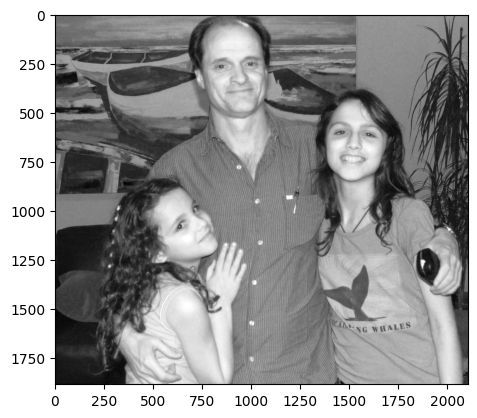

In [4]:
img = imread('CamisaRayas.jpg')

X = img[:,:,0] # convertimos la imagen a blanco y negro
plt.imshow(X,cmap='gray')
plt.show()

Submuestreamos sin el filtro anti-aliasing:

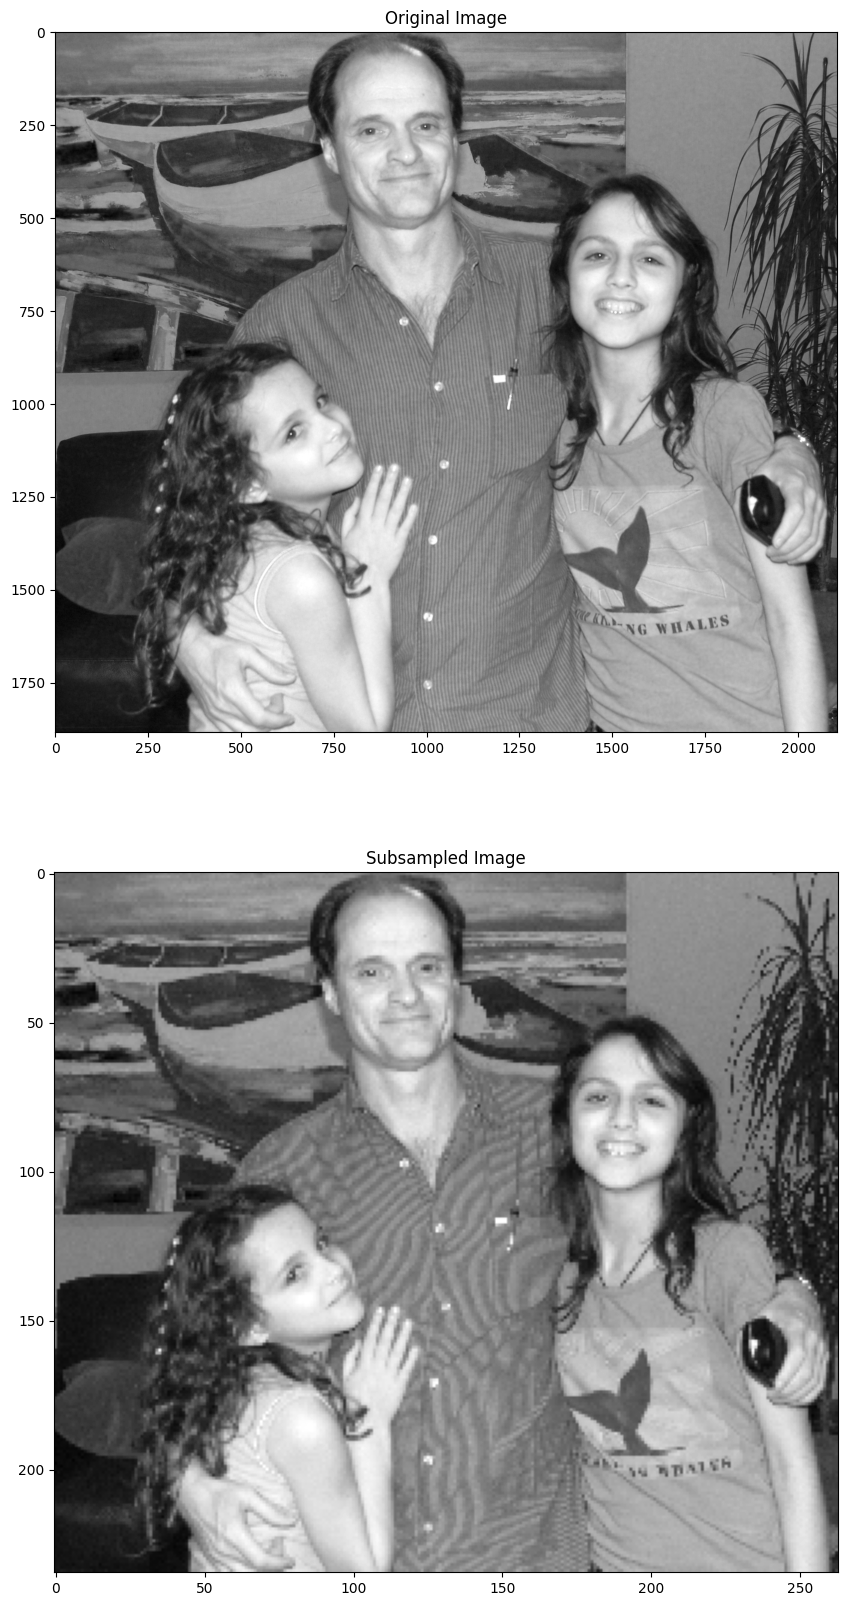

In [6]:
def subsampling(X,s):
  (N,M) = X.shape
  N2 = int(N/s)
  M2 = int(M/s)

  Y = np.zeros((N2,M2))
  for i2 in range(N2):
    i = int(i2*s)
    for j2 in range(M2):
      j = int(j2*s)
      Y[i2,j2] = X[i,j]
  return Y

m = 8 # subsampling each m pixels
Y = subsampling(X,m)

plt.figure(figsize=(40,20))


plt.subplot(211),plt.imshow(np.abs(X), "gray"), plt.title("Original Image")
plt.subplot(212),plt.imshow(np.abs(Y), "gray"), plt.title("Subsampled Image")

plt.show()

Le agregamos un filtro paso bajos en Fourier:

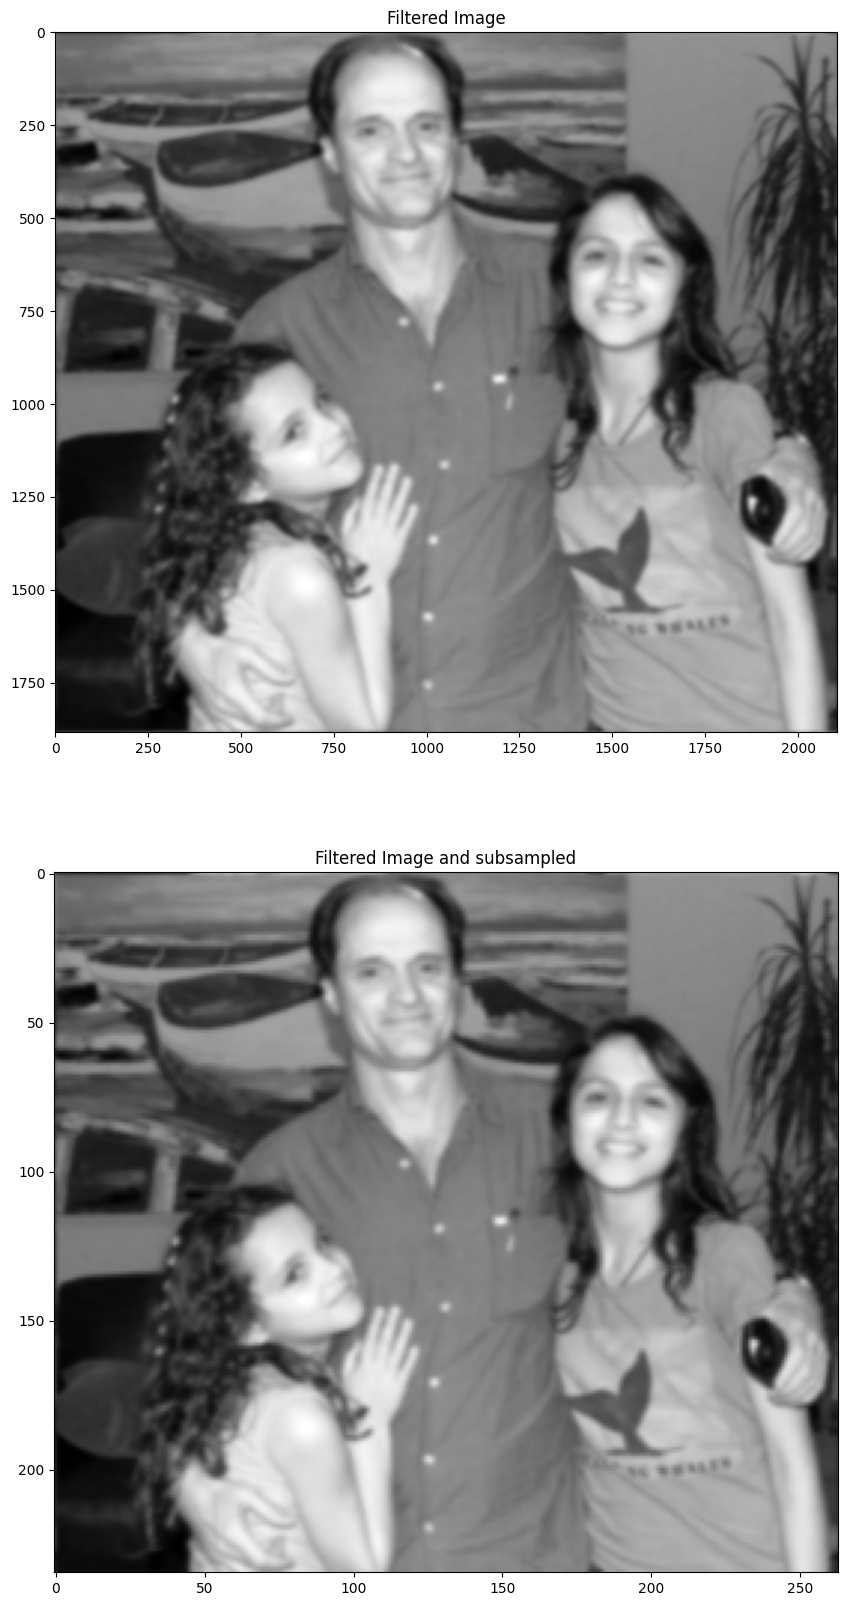

In [9]:
def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

X_ft = fft2(X)
X_ftc = fftshift(X_ft)

Do = 50

plt.figure(figsize=(40,20))


Yo_ftc = X_ftc * gaussianLP(Do,X.shape)
Yo_ft = ifftshift(Yo_ftc)
Yo = ifft2(Yo_ft).real

Y  = subsampling(Yo,m)

plt.subplot(211),plt.imshow(np.abs(Yo), "gray"), plt.title("Filtered Image")
plt.subplot(212),plt.imshow(np.abs(Y), "gray"), plt.title("Filtered Image and subsampled")

plt.show()

# 4) Eliminación de Ruido
(4 Puntos)

Para este ejercicio,

* Descargar la imagen `https://www.dropbox.com/s/t4vps4sspp9ca0r/sailing_noise.png`

* Eliminar el ruido de la imagen usando un filtro Butterworth adecuado, es decir que no se vean anillos de replica alrededor del velero de la imagen.


<font color='orange'>NOTA: En este ejercicio se espera que elimine completamente el ruido de alta frecuencia, el resultado será una imagen borrosa sin ruido.</font>


In [10]:
!wget https://www.dropbox.com/s/t4vps4sspp9ca0r/sailing_noise.png

--2024-10-10 14:19:00--  https://www.dropbox.com/s/t4vps4sspp9ca0r/sailing_noise.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/nwru8k2yowb12zc9g8qmh/sailing_noise.png?rlkey=68ydsrzgud2vcyh5ylzrutr7p [following]
--2024-10-10 14:19:00--  https://www.dropbox.com/scl/fi/nwru8k2yowb12zc9g8qmh/sailing_noise.png?rlkey=68ydsrzgud2vcyh5ylzrutr7p
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccb3923fec66223e1e952f2a8d5.dl.dropboxusercontent.com/cd/0/inline/CcIpL9pLkhK1-ZTCcY8oMHdShPqy8jV0ZlflShE2ZS9aMP5i-pb6V-IvdHMc_JwPAeaxUNOLqkvbdNaCn1qc-TQeu3PzDXKROtXJ1Td_spUwivmh0cWbfmMeVimWfY2YDUM/file# [following]
--2024-10-10 14:19:01--  https://uccb3923fec66223e1e952f2a8d5.dl.dropboxusercontent.com/cd/0/inline/CcIpL9p

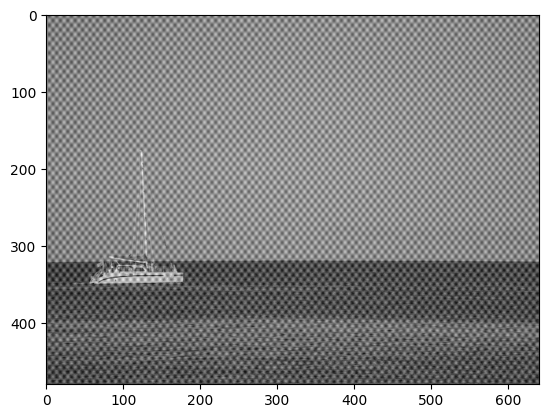

In [11]:
img_2 = imread('sailing_noise.png')
plt.imshow(img_2,cmap='gray')
plt.show()

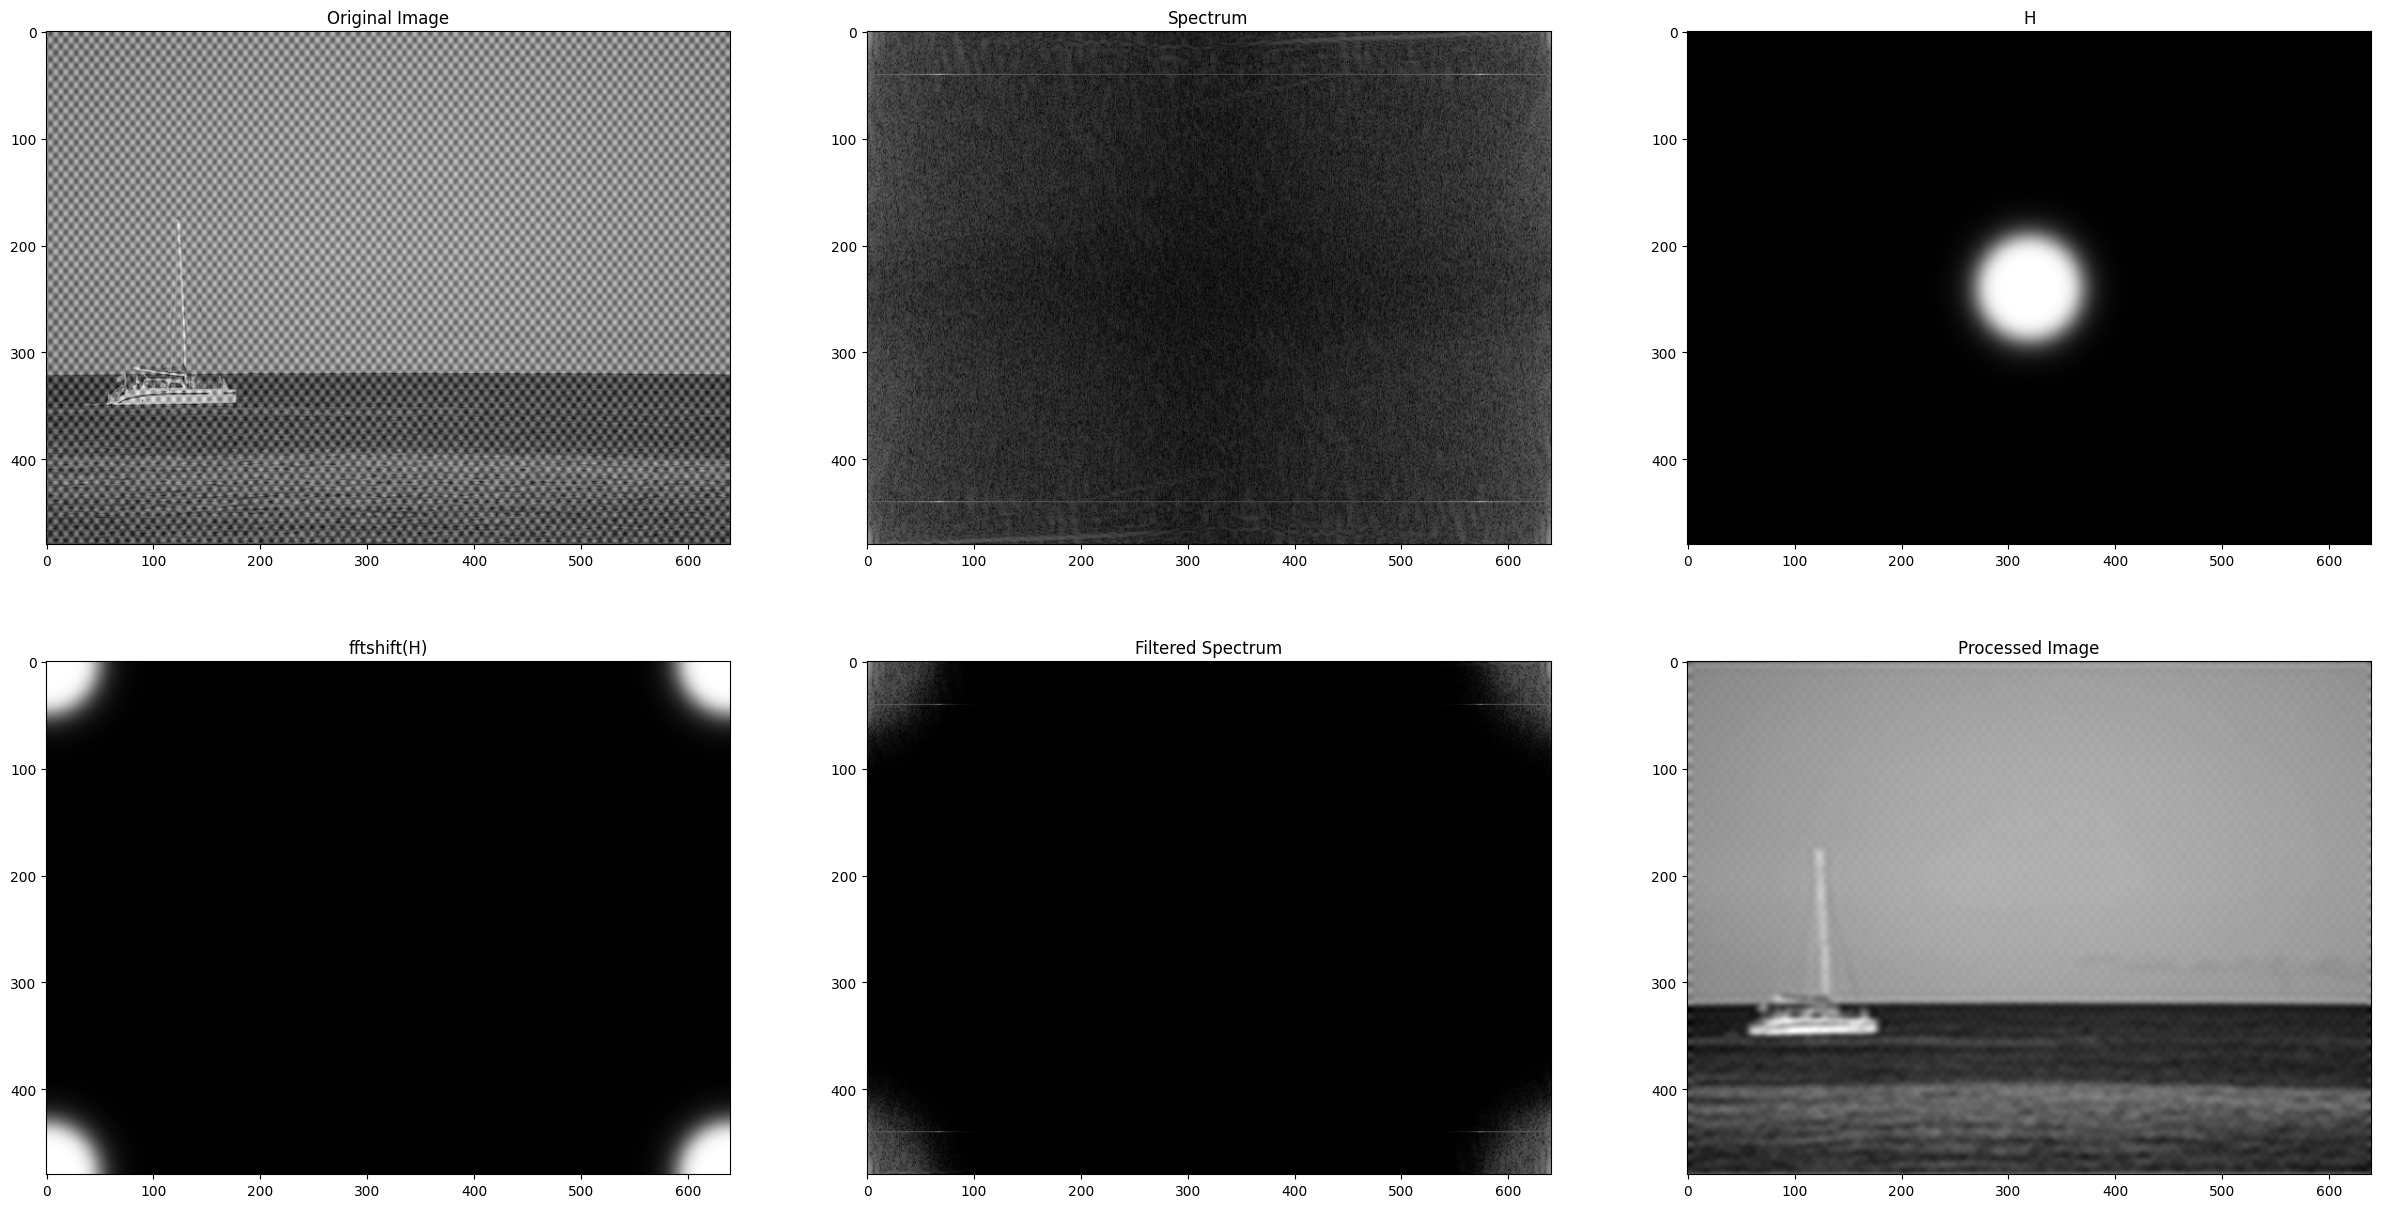

In [31]:
#Eliminar el ruido de la imagen usando un filtro Butterworth adecuado, es decir que no se vean anillos de replica alrededor del velero de la imagen.

def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

Do     = 50 # stop frequency
n      = 4  # Butterworth order

H = butterworthLP(Do,img_2.shape,n)

plt.figure(figsize=(30,15))

plt.subplot(231), plt.imshow(img_2, "gray"), plt.title("Original Image")

I2_ft = fft2(img_2)
plt.subplot(232), plt.imshow(np.log(1+np.abs(I2_ft)), "gray"), plt.title("Spectrum")

plt.subplot(233), plt.imshow(H, "gray"), plt.title("H")

H_c = fftshift(H)
plt.subplot(234), plt.imshow(H_c, "gray"), plt.title("fftshift(H)")

Y2_ft = I2_ft * H_c
plt.subplot(235), plt.imshow(np.log(1+np.abs(Y2_ft)), "gray"), plt.title("Filtered Spectrum")

I2_new = ifft2(Y2_ft)
plt.subplot(236), plt.imshow(np.abs(I2_new), "gray"), plt.title("Processed Image")

plt.show()

# 5) Filtro de agudización

(5 puntos)

Para el siguiente ejercicio,

* Descargar la imagen almacenada en `https://www.dropbox.com/s/z5i54drsqkt4vsu/blurdrops.png`

* Usando un filtro de agudización que utilice un filtro Gaussiano resalte los detalles de la imagen.


<font color='orange'>NOTA: En este ejercicio se espera una imagen de salida más nítida.</font>




In [32]:
!wget https://www.dropbox.com/s/z5i54drsqkt4vsu/blurdrops.png

--2024-10-10 14:39:31--  https://www.dropbox.com/s/z5i54drsqkt4vsu/blurdrops.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/17g7bm4thbcsaaiwsprnw/blurdrops.png?rlkey=wngnzjo53m7nfybcuzfj28fz0 [following]
--2024-10-10 14:39:31--  https://www.dropbox.com/scl/fi/17g7bm4thbcsaaiwsprnw/blurdrops.png?rlkey=wngnzjo53m7nfybcuzfj28fz0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7fb27811b441d28a899adcbbd0.dl.dropboxusercontent.com/cd/0/inline/CcKjYOjNBJU_JQfAkgzkVSbba46dw0nH5aw9dDAkSGzjVGCU4g9aaDVs5cY0HtHZjwug57D9YheSNNrESKBPmYho84D35GjAapI32Ibmdo3P98Ii0vbmTI9qUEoIG71a4Sk/file# [following]
--2024-10-10 14:39:32--  https://uc7fb27811b441d28a899adcbbd0.dl.dropboxusercontent.com/cd/0/inline/CcKjYOjNBJU_JQfAkgz

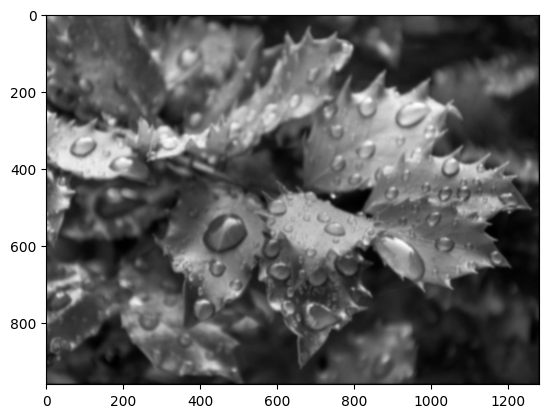

In [34]:
img_3 = imread('blurdrops.png')
plt.imshow(img_3,cmap='gray')
plt.show()

In [35]:
def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

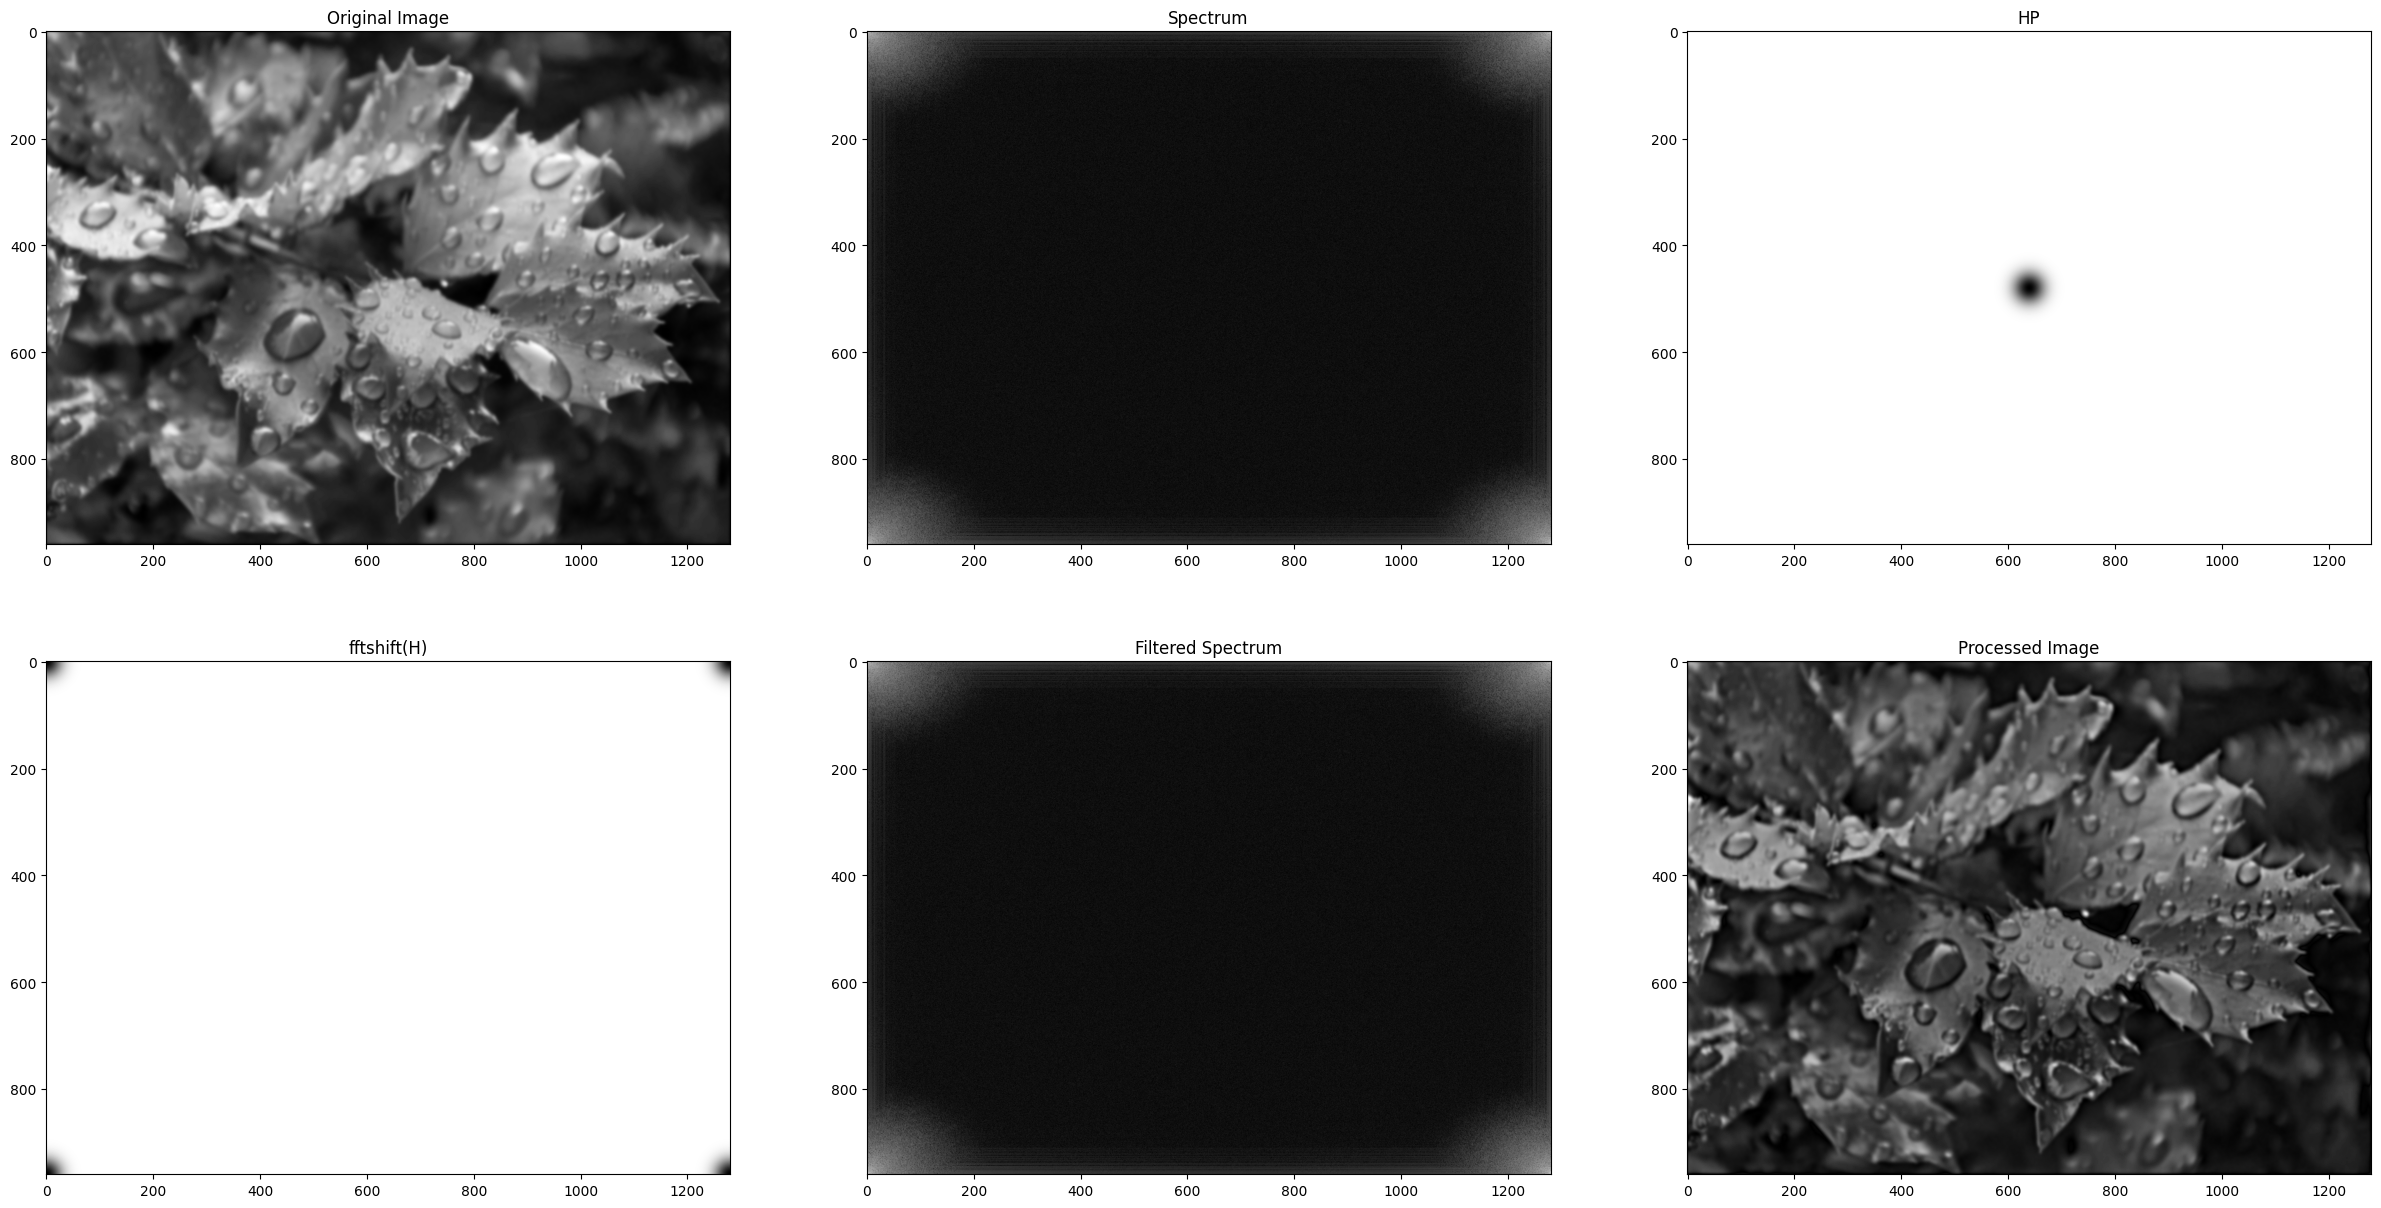

In [46]:
Do     = 20 # stop frequency
n      = 4  # Butterworth order

HighPass = gaussianHP(Do,img_3.shape)

plt.figure(figsize=(30,15))

plt.subplot(231), plt.imshow(img_3, "gray"), plt.title("Original Image")

I3_ft = fft2(img_3)
plt.subplot(232), plt.imshow(np.log(1+np.abs(I3_ft)), "gray"), plt.title("Spectrum")

plt.subplot(233), plt.imshow(HighPass, "gray"), plt.title("HP")

H_g = fftshift(HighPass)
plt.subplot(234), plt.imshow(H_g, "gray"), plt.title("fftshift(H)")

Y3_ft = I3_ft * H_g
plt.subplot(235), plt.imshow(np.log(1+np.abs(I3_ft)), "gray"), plt.title("Filtered Spectrum")

I3_new = ifft2(Y3_ft) + img_3
plt.subplot(236), plt.imshow(np.abs(I3_new), "gray"), plt.title("Processed Image")

plt.show()

# <font color='red'>SUBIR EJERCICIO DE FORMA INDIVIDUAL A CANVAS</font>

